In [4]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

/tmp/ipykernel_7130/3022712572.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df = pd.read_csv("wage-data-coast.csv")
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


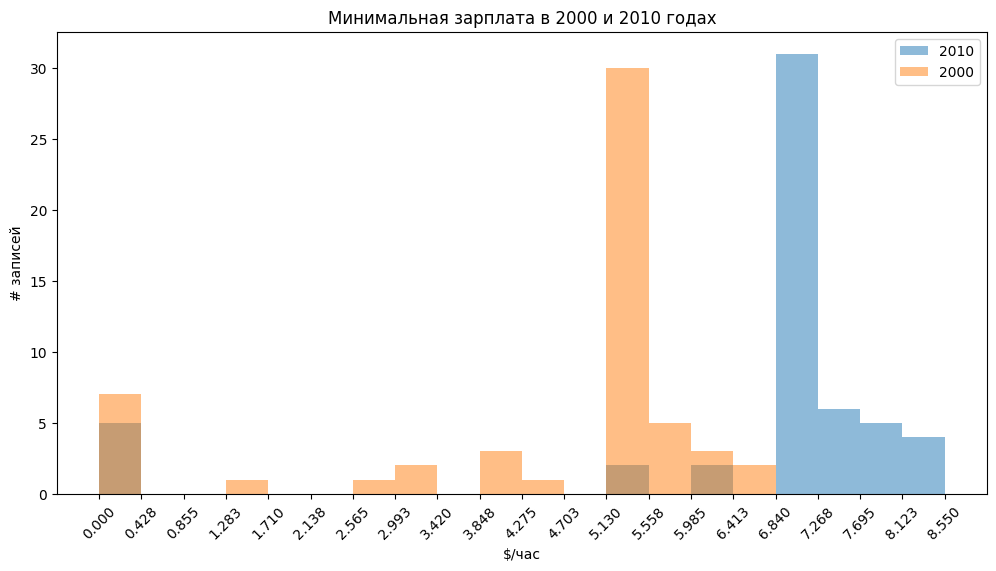

In [3]:
data = df[df["Year"] == 2000]["Salary"]
data1 = df[df["Year"] == 2010]["Salary"]

fig, ax = plt.subplots(figsize=(12, 6))
_, bins1, _ = ax.hist(data1, label="2010", alpha=0.5, bins=20)
ax.hist(data, label="2000", alpha=0.5, bins=bins1)

ax.set_title("Минимальная зарплата в 2000 и 2010 годах")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")
ax.set_xticks(list(bins1))
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.show()

Text(0, 0.5, '# записей')

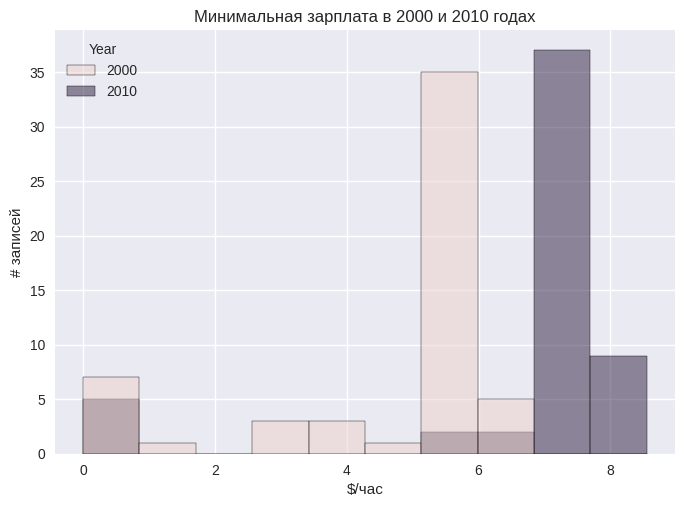

In [6]:
data = df[df["Year"].isin([2000, 2010])]
ax = sns.histplot(data=data, x="Salary", hue="Year")

ax.set_title("Минимальная зарплата в 2000 и 2010 годах")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")

<AxesSubplot: xlabel='Year', ylabel='Salary'>

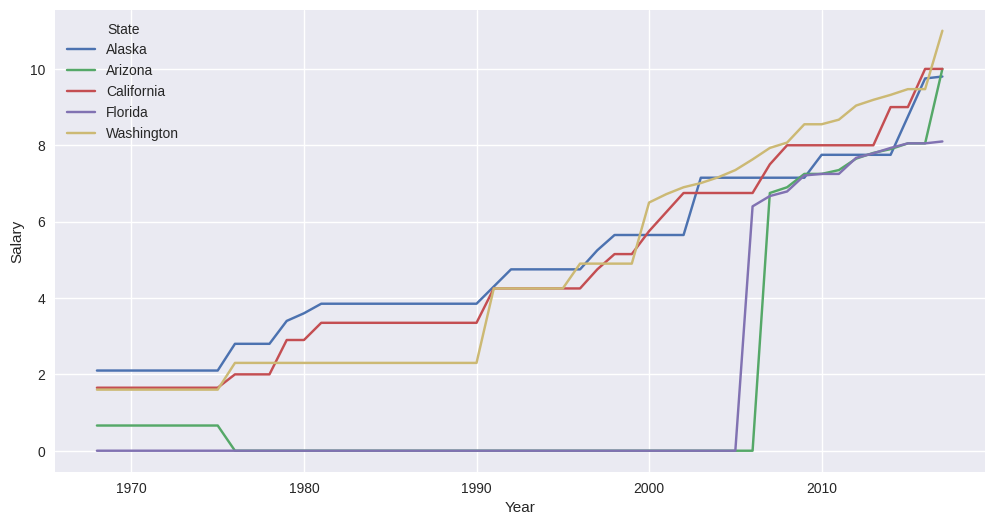

In [9]:
data = df[df["State"].isin(["Alaska", "California", "Washington", "Arizona", "Florida"])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x="Year", y="Salary", hue="State", ax=ax)

Text(0, 0.5, '# записей')

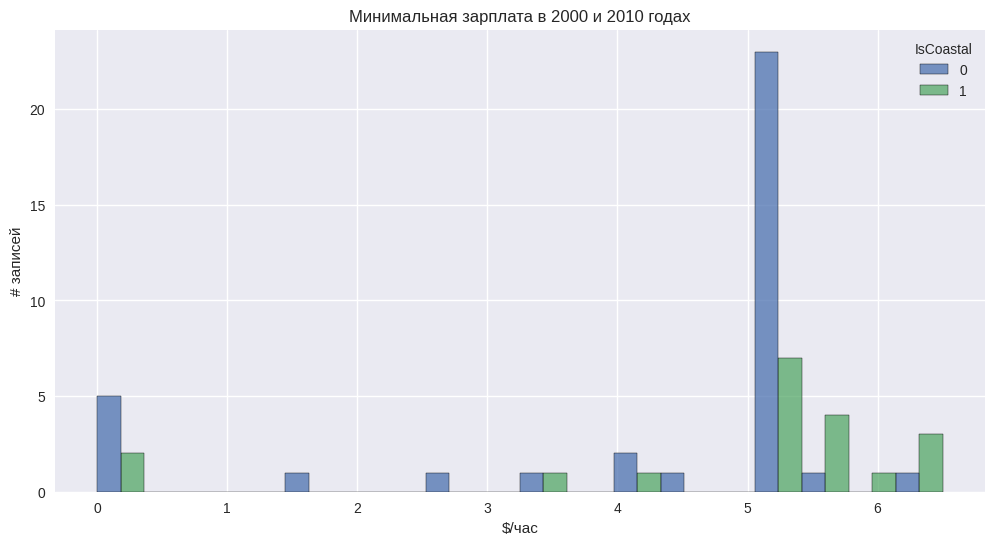

In [13]:
data = df[df["Year"]==2000]
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=data, x="Salary", hue="IsCoastal", ax=ax, multiple="dodge")

ax.set_title("Минимальная зарплата в 2000 и 2010 годах")
ax.set_xlabel("$/час")
ax.set_ylabel("# записей")

<AxesSubplot: xlabel='Year', ylabel='Salary'>

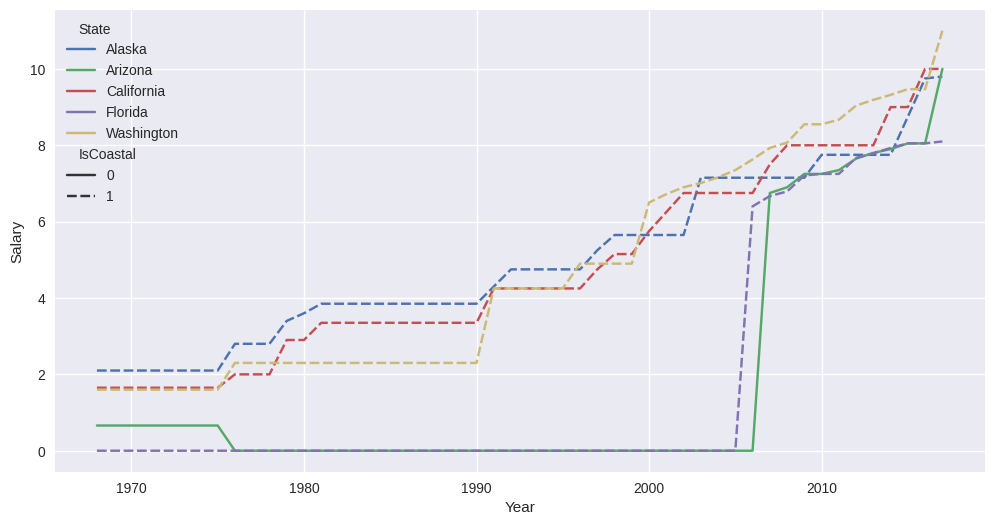

In [14]:
data = df[df["State"].isin(["Alaska", "California", "Washington", "Arizona", "Florida"])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x="Year", y="Salary", hue="State", ax=ax, style="IsCoastal")

In [16]:
df = pd.read_csv("wage-data-coast-with-population.csv")
df

,Year,State,Population,Salary,IsCoastal
0,1969,Alabama,3411770.0,0.00000,0
1,1969,Alaska,294290.0,2.10000,1
2,1969,Arizona,1702945.0,0.66000,0
3,1969,Arkansas,1893768.0,0.15625,0
4,1969,California,19745905.0,1.65000,1
...,...,...,...,...,...
2494,2017,Virginia,8465207.0,7.25000,1
2495,2017,Washington,7425432.0,11.00000,1
2496,2017,West Virginia,1817048.0,8.75000,0
2497,2017,Wisconsin,5792051.0,7.25000,0


In [24]:
data = df[df["State"].isin(["Alaska", "California", "Washington", "Arizona", "Florida"])]

df_t = data[data["Year"]==2017][["State", "Population"]].sort_values("Population")
df_t.loc[:, "Size"] = list(range(1, df_t.shape[0] + 1))
data1 = data.merge(df_t[["State", "Size"]], how="left", on="State")
data1

,Year,State,Population,Salary,IsCoastal,Size
0,1969,Alaska,294290.0,2.10,1,1
1,1969,Arizona,1702945.0,0.66,0,2
2,1969,California,19745905.0,1.65,1,5
3,1969,Florida,6567950.0,0.00,1,4
4,1969,Washington,3392905.0,1.60,1,3
...,...,...,...,...,...,...
240,2017,Alaska,739786.0,9.80,1,1
241,2017,Arizona,7048876.0,10.00,0,2
242,2017,California,39399349.0,10.00,1,5
243,2017,Florida,20976812.0,8.10,1,4


(<AxesSubplot: xlabel='Year', ylabel='Salary'>,)

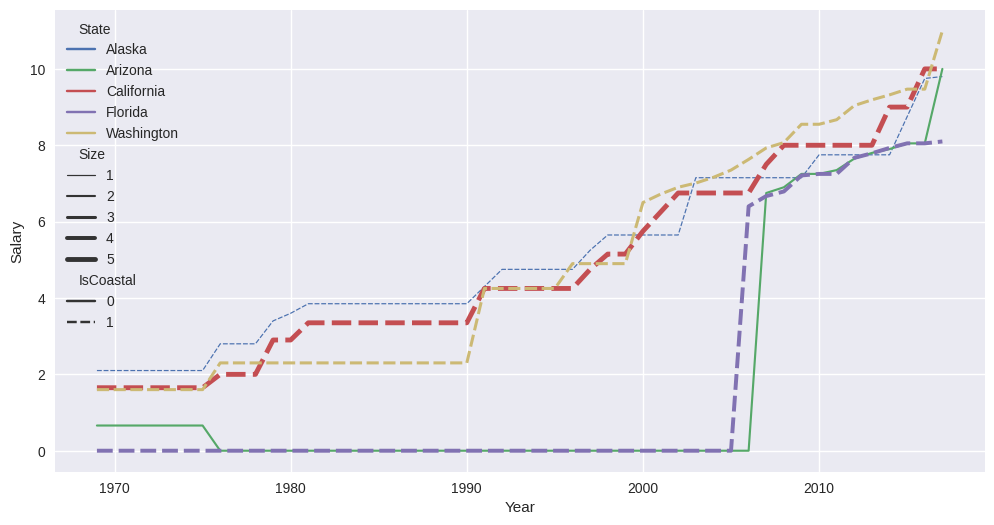

In [25]:
data = df[df["State"].isin(["Alaska", "California", "Washington", "Arizona", "Florida"])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data1, x="Year", y="Salary", hue="State", ax=ax, 
             style="IsCoastal", size="Size") 

<AxesSubplot: xlabel='Year', ylabel='Salary'>

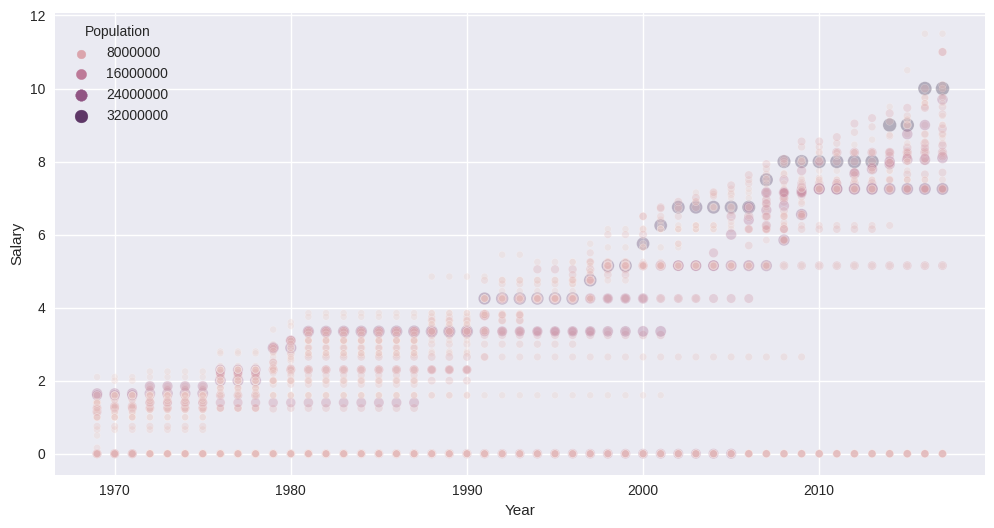

In [33]:
data = df

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=data, x="Year", y="Salary", ax=ax, hue="Population",
               alpha=0.3, size="Population")


/tmp/ipykernel_7130/3048313256.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns .barplot(data=data, x="IsCoastal", y="Salary", ax=ax, ci=None, hue="Year")


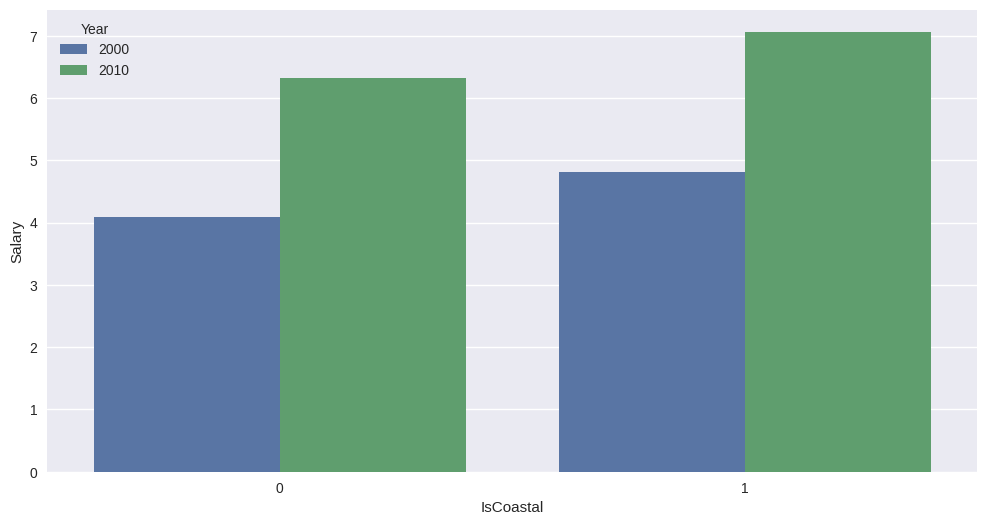

In [38]:
data = df[df["Year"].isin([2000, 2010])]

fig, ax = plt.subplots(figsize=(12, 6))

sns .barplot(data=data, x="IsCoastal", y="Salary", ax=ax, ci=None, hue="Year")

plt.show()

Text(0, 0.5, 'Население, человек')

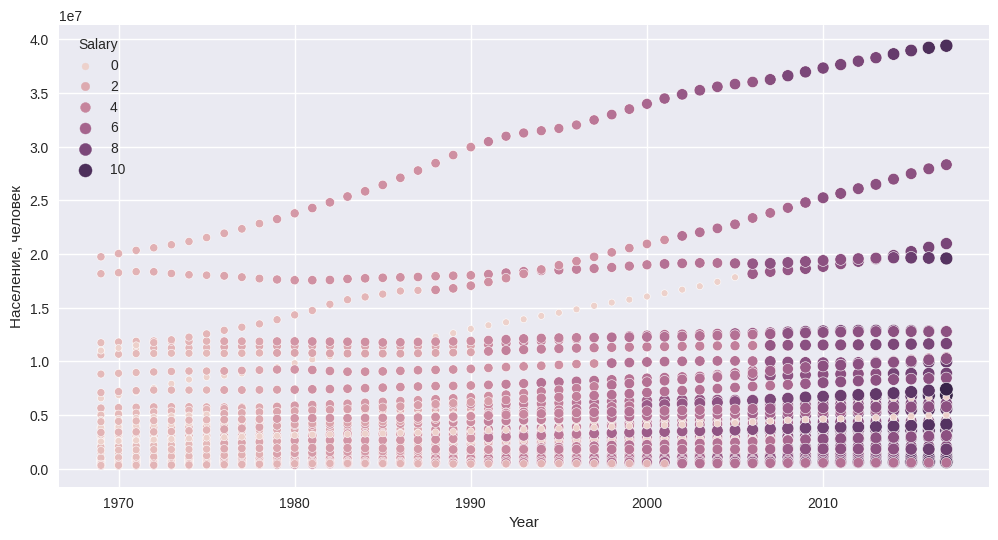

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df, x="Year", y="Population", hue="Salary", size="Salary", ax=ax)
ax.set_ylabel("Население, человек")

In [42]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


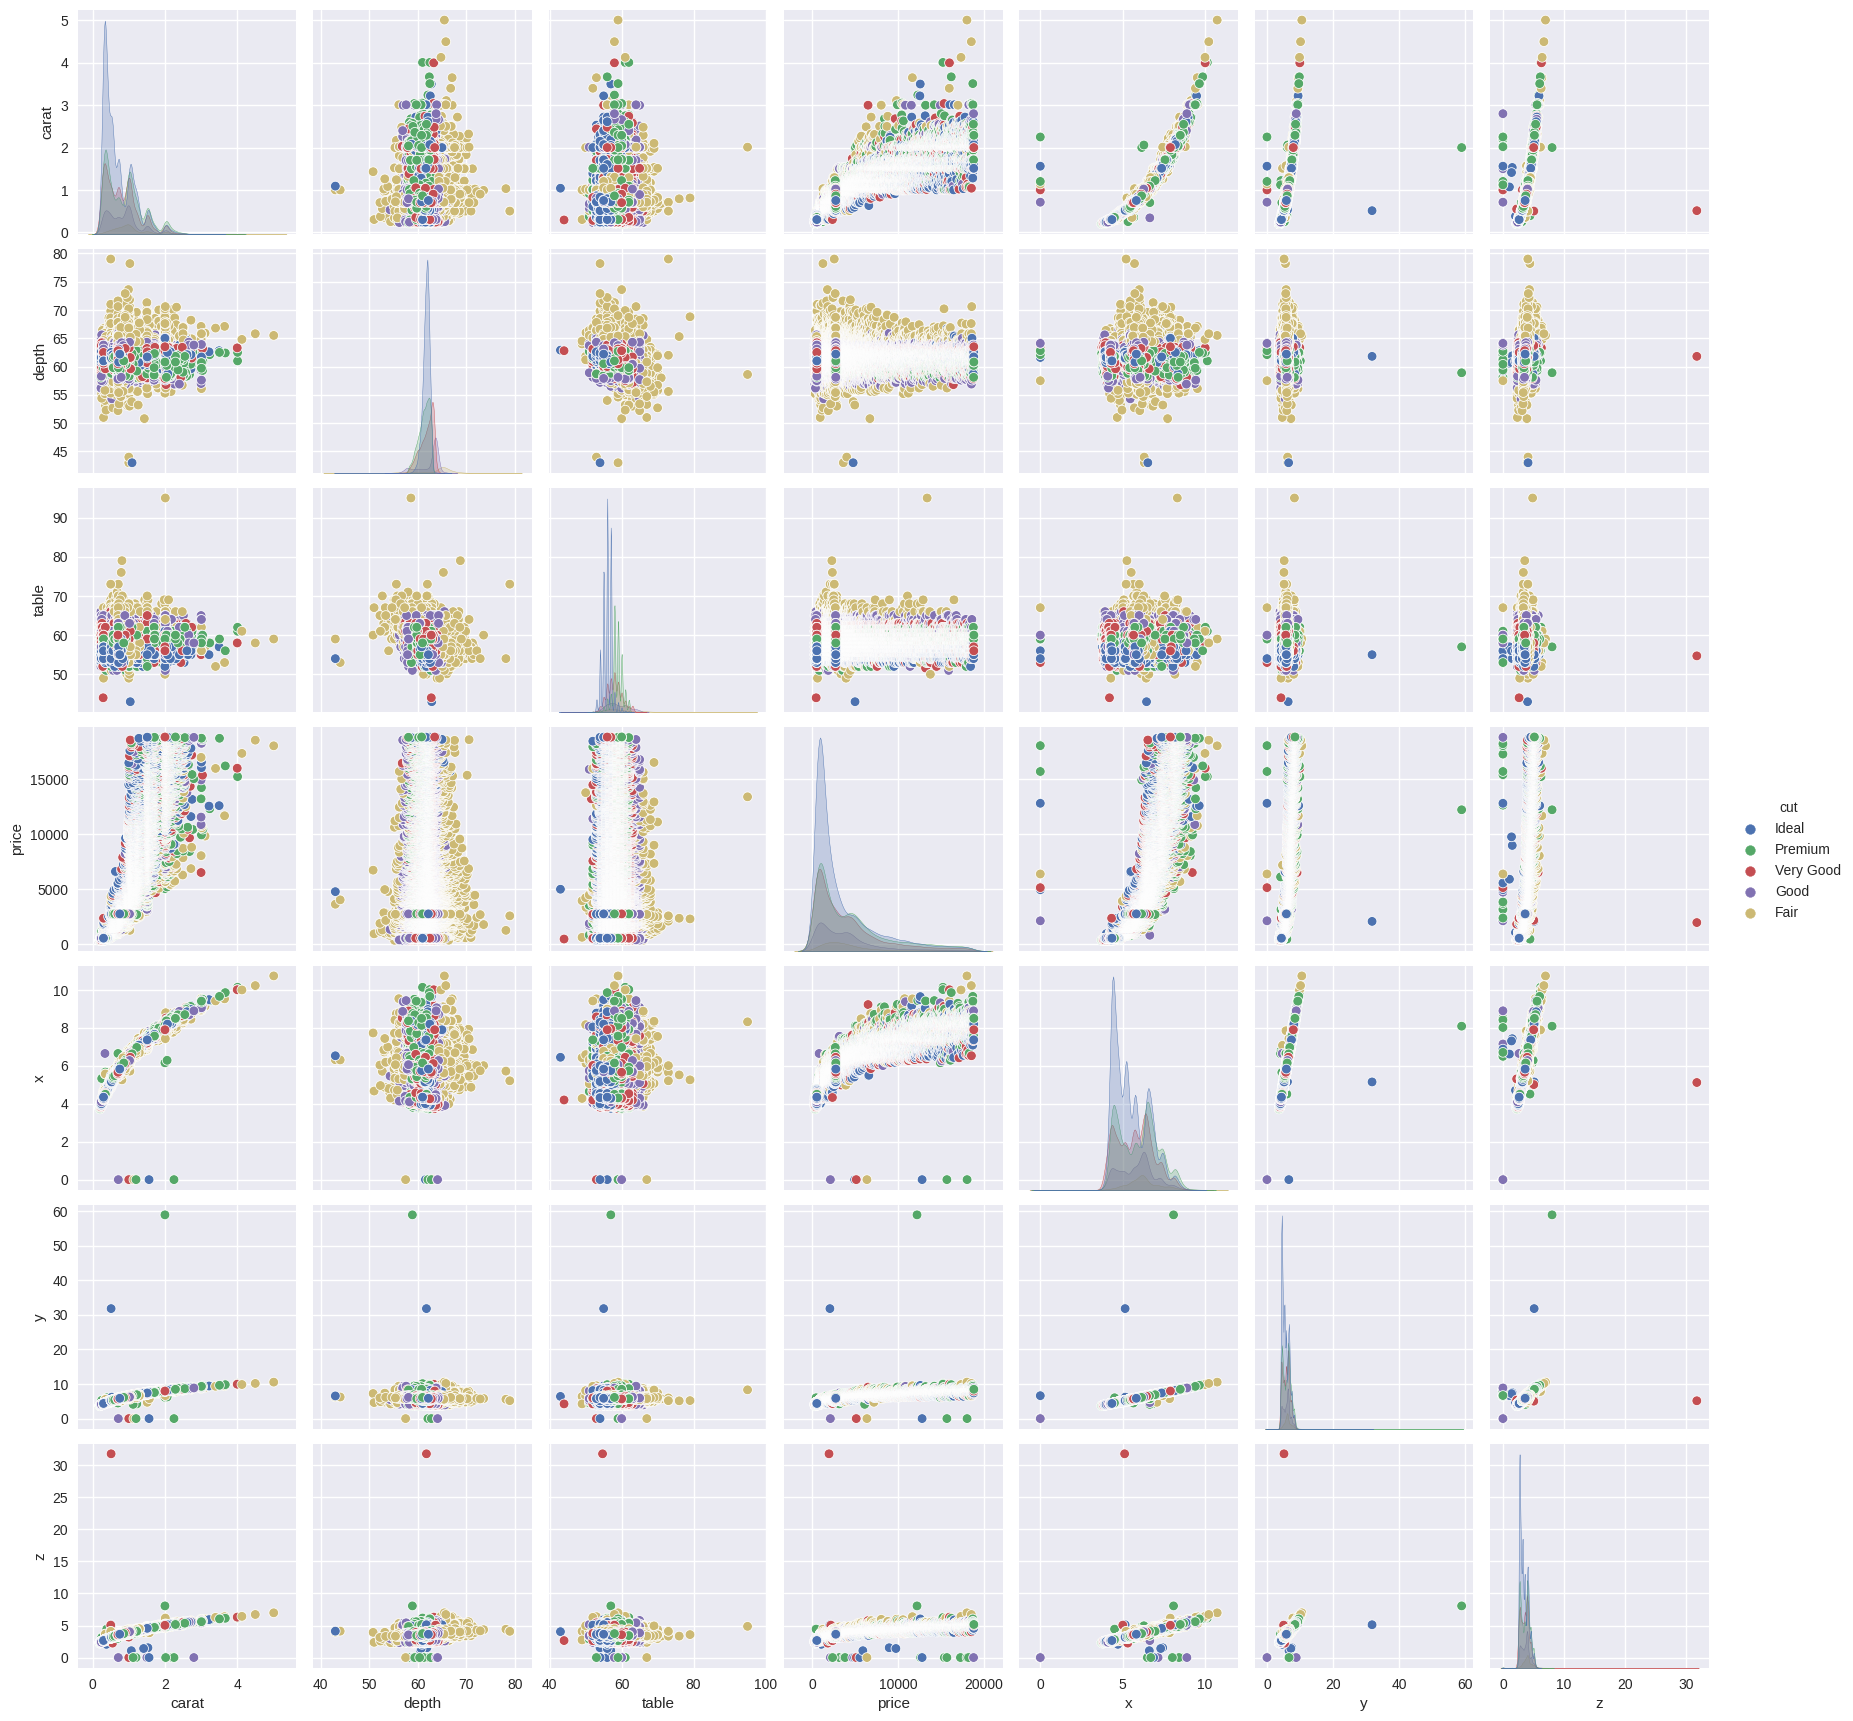

In [45]:
sns.pairplot(df, hue="cut")

In [ ]:
g = sns.FacetGrid(df, row="cut", col="color", hue="clarity")
g.map(sns.scatterplot, "carat", "price")
g.add_legend

In [53]:
sns.color_palette("rocket", 7)

[(0.18643324, 0.09165431, 0.22699705),
 (0.38092887, 0.12061482, 0.32506528),
 (0.59096382, 0.10810205, 0.35847347),
 (0.7965014, 0.10506637, 0.31063031),
 (0.92676657, 0.29823282, 0.24285536),
 (0.95922872, 0.53307513, 0.3748895),
 (0.96592829, 0.73844258, 0.60053991)]

In [54]:
sns.color_palette("husl", 7)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

/tmp/ipykernel_7130/2708248656.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df, x="color", y="price", palette="dark", ci=None,saturation=200,


<AxesSubplot: xlabel='color', ylabel='price'>

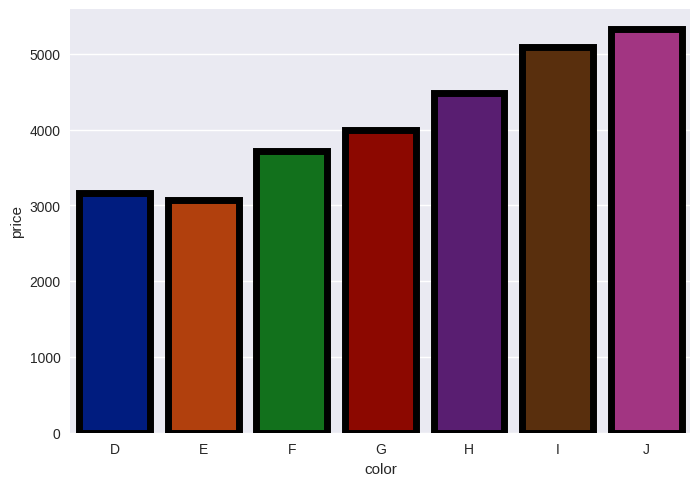

In [59]:
sns.barplot(df, x="color", y="price", palette="dark", ci=None,saturation=200,
           linewidth=5, edgecolor="black")